In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
terr_dataset=pd.read_csv('globalterrorismdb.csv',encoding='Loat')
terr_dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Exploratory Data Analysis


In [5]:
terr_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [9]:
terr_dataset_final =terr_dataset[['iyear','imonth','iday','country_txt','region_txt','provstate','Type_of_attack1_txt',
                                  'targtype1_txt','target1','weaptype1_txt','nkill','nwound','gname','summary']]
terr_dataset_final.rename(columns={"iyear":"Year",
                                   "imonth":"Month",
                                   "iday":"Day",
                                   "country_txt":"Country",
                                   "region_txt":"Region",
                                   "provstate":"State",
                                   "Type_of_attack1_txt":"Type_of_attack",
                                   "targtype1_txt":"target_type",
                                   "target1":"target",
                                   "weaptype1_txt":"Weapon_type",
                                   "nkill":"No_of_Killed",
                                   "nwound":"No_of_Wounded",
                                   "gname":"Group"},inplace=True)
terr_dataset_final.sample(6)

,Year,Month,Day,Country,Region,State,Attacktype,target_type,target,Weapon_type,No_of_Killed,No_of_Wounded,Group,summary
35958,1988,10,16,Spain,Western Europe,Navarre,Bombing/Explosion,Police,Civil Guard Armored Vehicle,Explosives,1.0,6.0,Basque Fatherland and Freedom (ETA),NaN
10570,1980,4,0,Syria,Middle East & North Africa,Aleppo,Assassination,Government (General),Syrian Communist Part Member and Leader,Unknown,1.0,0.0,Muslim Brotherhood,NaN
109179,2012,7,6,Afghanistan,South Asia,Nangarhar,Bombing/Explosion,Unknown,Unknown,Explosives,0.0,0.0,Unknown,07/06/2012: An explosive device was found in C...
36262,1988,11,18,Peru,South America,Lima,Armed Assault,Journalists & Media,office,Firearms,0.0,0.0,Movement of the Revolutionary Left (MIR) (Peru),NaN
83107,2007,5,28,Iraq,Middle East & North Africa,Baghdad,Bombing/Explosion,Religious Figures/Institutions,Qadiriya shrine,Explosives,21.0,28.0,Unknown,05/28/2007: A truck bomb outside a revered Sun...
57079,1994,8,19,Turkey,Middle East & North Africa,Adana,Bombing/Explosion,Utilities,Electrical Transformer,Explosives,1.0,0.0,Unknown,NaN


In [10]:
terr_dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           181691 non-null  int64  
 1   Month          181691 non-null  int64  
 2   Day            181691 non-null  int64  
 3   Country        181691 non-null  object 
 4   Region         181691 non-null  object 
 5   State          181270 non-null  object 
 6   Attacktype     181691 non-null  object 
 7   target_type    181691 non-null  object 
 8   target         181055 non-null  object 
 9   Weapon_type    181691 non-null  object 
 10  No_of_Killed   171378 non-null  float64
 11  No_of_Wounded  165380 non-null  float64
 12  Group          181691 non-null  object 
 13  summary        115562 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 19.4+ MB


In [11]:
terr_dataset_final.describe()

,Year,Month,Day,No_of_Killed,No_of_Wounded
count,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,2.403272,3.167668
std,13.259430,3.388303,8.814045,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


In [12]:
#Data Cleaning
terr_dataset_final.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
Region               0
State              421
Attacktype           0
target_type          0
target             636
Weapon_type          0
No_of_Killed     10313
No_of_Wounded    16311
Group                0
summary          66129
dtype: int64

In [13]:
# Missing values fill -
# 1. No of Killed =
terr_dataset_final['No_of_Killed'].head()

0    1.0
1    0.0
2    1.0
3    NaN
4    NaN
Name: No_of_Killed, dtype: float64

In [14]:
terr_dataset_final['No_of_Killed']=terr_dataset_final['No_of_Killed'].fillna(0)
terr_dataset_final['No_of_Killed'].head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: No_of_Killed, dtype: float64

In [15]:
terr_dataset_final.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
Region               0
State              421
Attacktype           0
target_type          0
target             636
Weapon_type          0
No_of_Killed         0
No_of_Wounded    16311
Group                0
summary          66129
dtype: int64

In [16]:
Number of wounded
terr_dataset_final['No_of_Wounded']=terr_dataset_final['No_of_Wounded'].fillna(0)
terr_dataset_final.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
Region               0
State              421
Attacktype           0
target_type          0
target             636
Weapon_type          0
No_of_Killed         0
No_of_Wounded        0
Group                0
summary          66129
dtype: int64

In [17]:
terr_dataset_final['target']=terr_dataset_final['target'].fillna("Not Known")
terr_dataset_final.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
Region               0
State              421
Attacktype           0
target_type          0
target               0
Weapon_type          0
No_of_Killed         0
No_of_Wounded        0
Group                0
summary          66129
dtype: int64

In [18]:
terr_dataset_final['summary']=terr_dataset_final['summary'].fillna("Not Known")
terr_dataset_final.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
State            421
Attacktype         0
target_type        0
target             0
Weapon_type        0
No_of_Killed       0
No_of_Wounded      0
Group              0
summary            0
dtype: int64

In [19]:
terr_dataset_final.shape

(181691, 14)

In [20]:
terr_dataset_final.duplicated().sum()

10146

In [21]:
# since we have 10146 duplicate values we can drop them
terr_dataset_final=terr_dataset_final.drop_duplicates()

In [22]:
terr_dataset_final.shape

(171545, 14)

In [23]:
#checking number of unique values in each column
terr_dataset_final.nunique()

Year                 47
Month                13
Day                  32
Country             205
Region               12
State              2855
Attacktype            9
target_type          22
target            86007
Weapon_type          12
No_of_Killed        205
No_of_Wounded       238
Group              3537
summary          112493
dtype: int64

In [24]:
#Unique Values of each Column -
for col in terr_dataset_final[:]:
    print(col,":",terr_dataset_final[col].unique())
    print("-"*80)

Year : [1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]
----------------------------------------------------------------------------------------------------
Month : [ 7  0  1  2  3  4  5  6  8  9 10 11 12]
----------------------------------------------------------------------------------------------------
Day : [ 2  0  1  3  6  8  9 10 11 12 13 14 15 19 20 21 22 25 26 27 28 30 31  4
  7 16 17 18 23 24  5 29]
----------------------------------------------------------------------------------------------------
Country : ['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Ireland' 'Turkey'
 'Paraguay' 'Iran' 'U

In [25]:
terr_dataset_final['Month'].value_counts()

5     15706
7     15349
8     14939
10    14705
6     14532
3     14444
4     14424
11    14257
1     14142
9     13246
2     13023
12    12758
0        20
Name: Month, dtype: int64

In [26]:
#we can see there are 13 unique values in month column and on carefully observeing 
#there is a value 0 in the list so trying to replace it with the most frequent occuring month
terr_dataset_final["Month"].mode()

0    5
dtype: int64

In [27]:
terr_dataset_final['Month']=terr_dataset_final['Month'].replace(0,terr_dataset_final['Month'].mode()[0])

In [28]:
terr_dataset_final['Month'].value_counts()

5     15726
7     15349
8     14939
10    14705
6     14532
3     14444
4     14424
11    14257
1     14142
9     13246
2     13023
12    12758
Name: Month, dtype: int64

Data Visualization

In [29]:
terr_dataset_final["Country"].value_counts()

Iraq                   23440
Pakistan               13787
Afghanistan            12486
India                  11557
Colombia                7486
                       ...  
International              1
Vatican City               1
Wallis and Futuna          1
Falkland Islands           1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

The dataset contains 205 nations for analysis.
Then, let's pick the top ten nations most afflicted by terrorism and the top ten nations least affected by terrorism.

In [31]:
#Least affected by terroism
terr_dataset_final["Country"].value_counts()[-10:]

New Hebrides           1
South Vietnam          1
North Korea            1
St. Lucia              1
Andorra                1
International          1
Vatican City           1
Wallis and Futuna      1
Falkland Islands       1
Antigua and Barbuda    1
Name: Country, dtype: int64

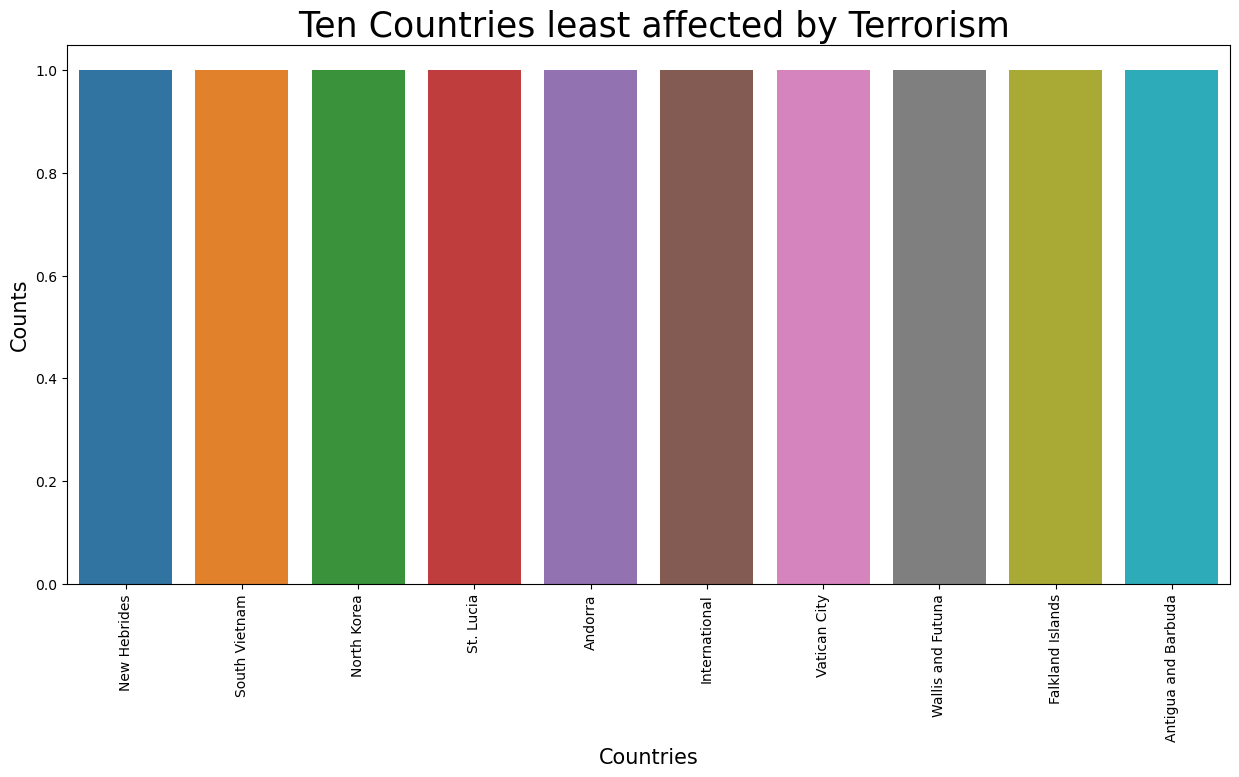

In [32]:
# Plotting the information graphically:

plt.figure(figsize=(15,7))
sns.barplot(x=terr_dataset_final["Country"].value_counts()[-10:].index,y=terr_dataset_final["Country"].value_counts()[-10:].values,data=terr_dataset_final)
plt.title(" Ten Countries least affected by Terrorism")
plt.xlabel("Countries")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show()

In [33]:
#Most affected by terroism
terr_dataset_final["Country"].value_counts()[:10]

Iraq              23440
Pakistan          13787
Afghanistan       12486
India             11557
Colombia           7486
Philippines        6762
Peru               5031
United Kingdom     4962
El Salvador        4176
Somalia            4121
Name: Country, dtype: int64

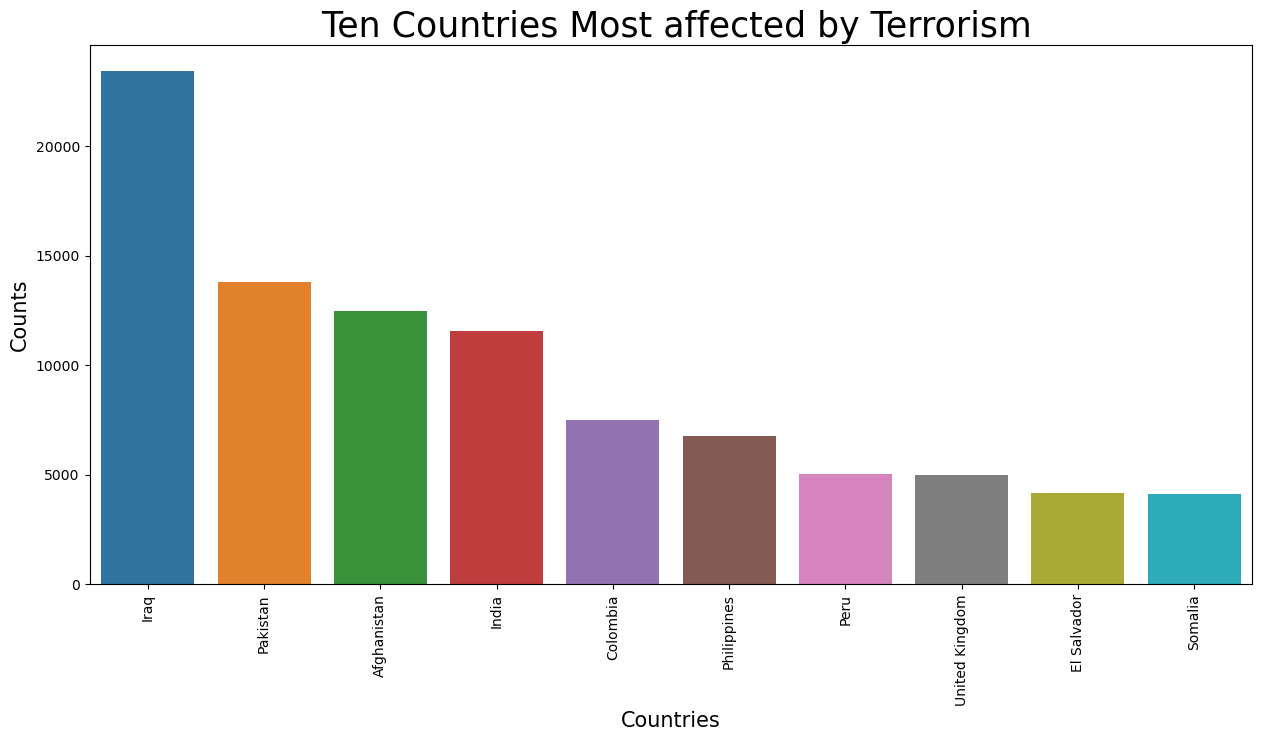

In [34]:
# Plotting the information graphically:

plt.figure(figsize=(15,7))
sns.barplot(x=terr_dataset_final["Country"].value_counts()[:10].index,y=terr_dataset_final["Country"].value_counts()[:10].values,data=terr_dataset_final)
plt.title(" Ten Countries Most affected by Terrorism")
plt.xlabel("Countries")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show()

Iraq, followed by Pakistan, is the nation most hit by terrorism.
There are just a few nations in which the number of attacks is one, such as Falkland Island, Antigua, and Barbuda

In [35]:
# Number of attacks every month in Iraq for the years i.e. 1970 - 2017
Iraq_month=terr_dataset_final.query("Country=='Iraq'").groupby('Month').mean()
Iraq_month['Day']


Month
1     15.956591
2     14.937206
3     15.751384
4     14.984383
5     16.383422
6     14.747363
7     15.323278
8     15.271196
9     16.252549
10    16.383673
11    15.859426
12    15.778409
Name: Day, dtype: float64

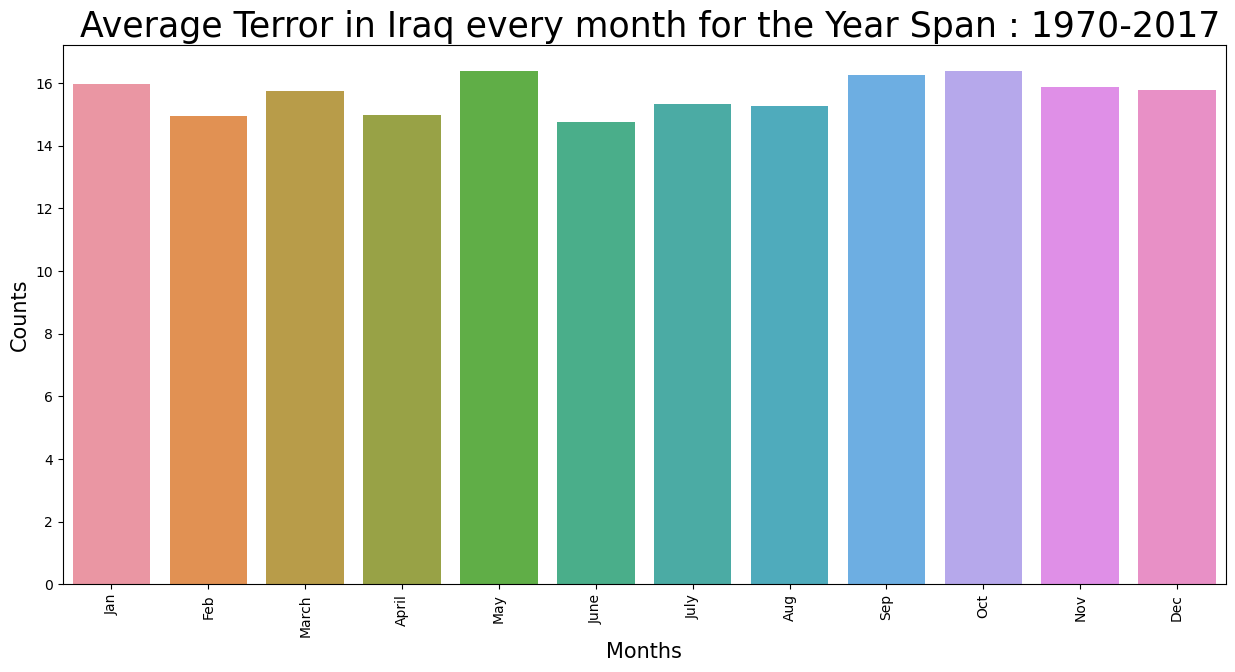

In [36]:
# Plotting the information graphically:

plt.figure(figsize=(15,7))
sns.barplot(x=['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'],y=Iraq_month['Day'],data=Iraq_month)
plt.title(" Average Terror in Iraq every month for the Year Span : 1970-2017",fontsize=25)
plt.xlabel("Months",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.xticks(rotation=90)
plt.show()





Between 1970 and 2017, Iraq has had on average 15 attacks monthly. 

In [37]:
# Region

Region=terr_dataset_final.groupby('Region')['Year'].count().sort_values(ascending=False).reset_index(name='Count')

Region

,Region,Count
0,Middle East & North Africa,48660
1,South Asia,43461
2,Sub-Saharan Africa,17060
3,South America,16528
4,Western Europe,15031
5,Southeast Asia,12057
6,Central America & Caribbean,8852
7,Eastern Europe,5007
8,North America,3349
9,East Asia,714


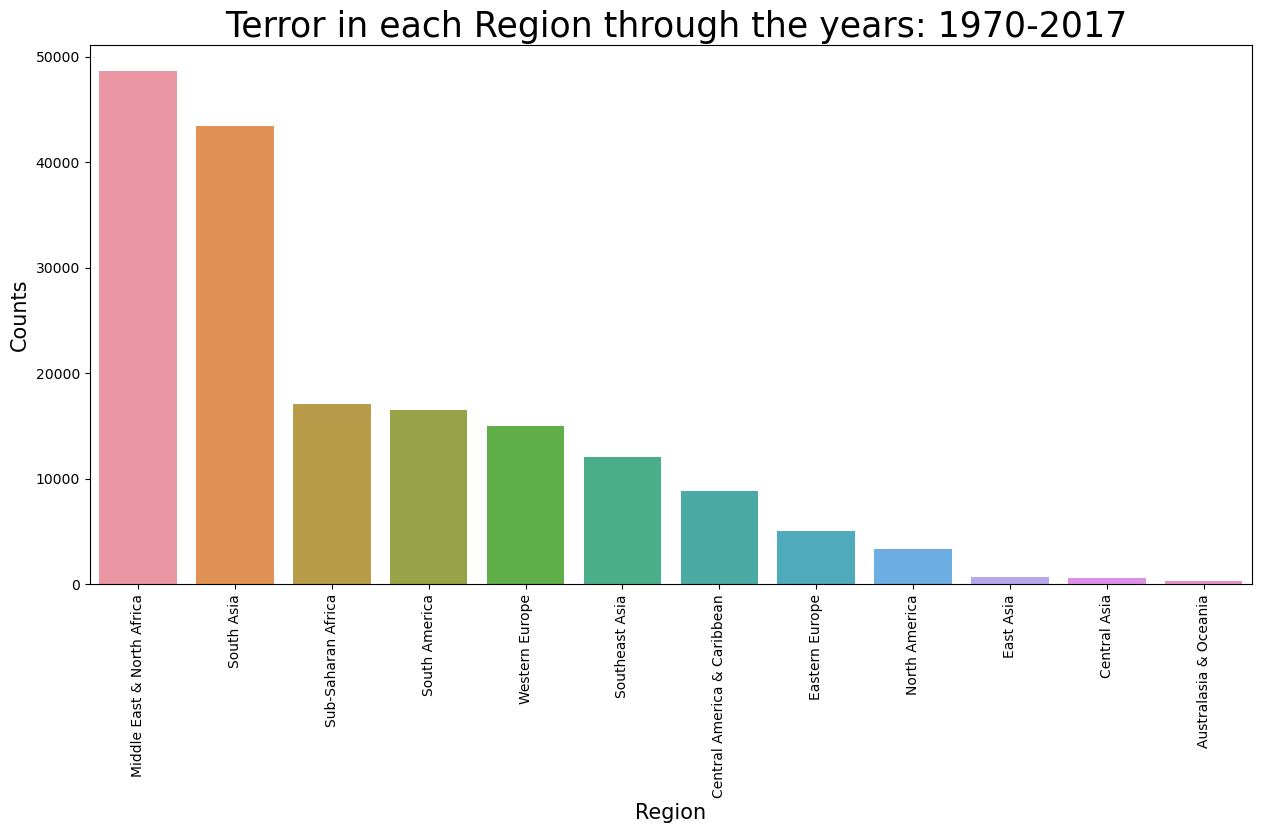

In [54]:
# Plotting the information graphically:

plt.figure(figsize=(15,7))
sns.barplot(x='Region',y='Count',data=Region)
plt.title(" Terror in each Region through the years: 1970-2017",fontsize=25)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.xticks(rotation=90)
plt.show()



Middle East & North Africa, South Asia, and Sub-Saharan Africa are the top three locations where terrorism happens most often.
Australia and Oceania are the areas with the fewest inhabitants, followed by Central Asia and finally East Asia.

In [39]:
# Analysing the type of attacks:
Type_of_attack=terr_dataset_final["Type_of_attack"].value_counts().sort_values(ascending=False).reset_index(name='Count')
Type_of_attack

,index,Count
0,Bombing/Explosion,81858
1,Armed Assault,41129
2,Assassination,18872
3,Hostage Taking (Kidnapping),10968
4,Facility/Infrastructure Attack,9283
5,Unknown,6911
6,Hostage Taking (Barricade Incident),939
7,Unarmed Assault,932
8,Hijacking,653


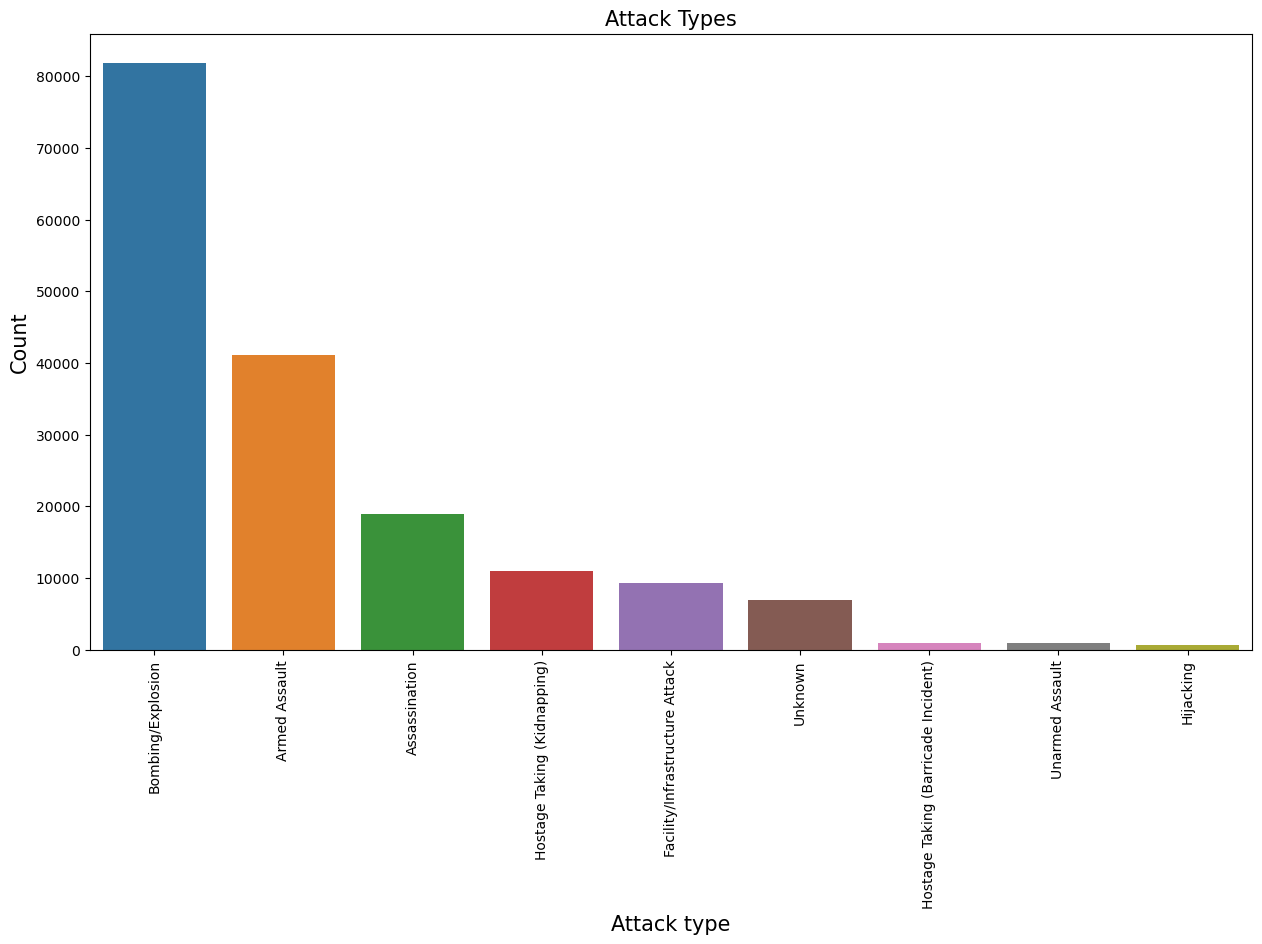

In [40]:
plt.figure(figsize=(15,8))
sns.barplot(x=Type_of_attack['index'],y=Type_of_attack['Count'])
plt.title("Attack Types",fontsize=15)
plt.xlabel("Attack type",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

The most common attack type is bombing/explosion, followed by armed assault and then assassination, which is quite uncommon.

In [41]:
# Analysing the number of attacks that took place every year

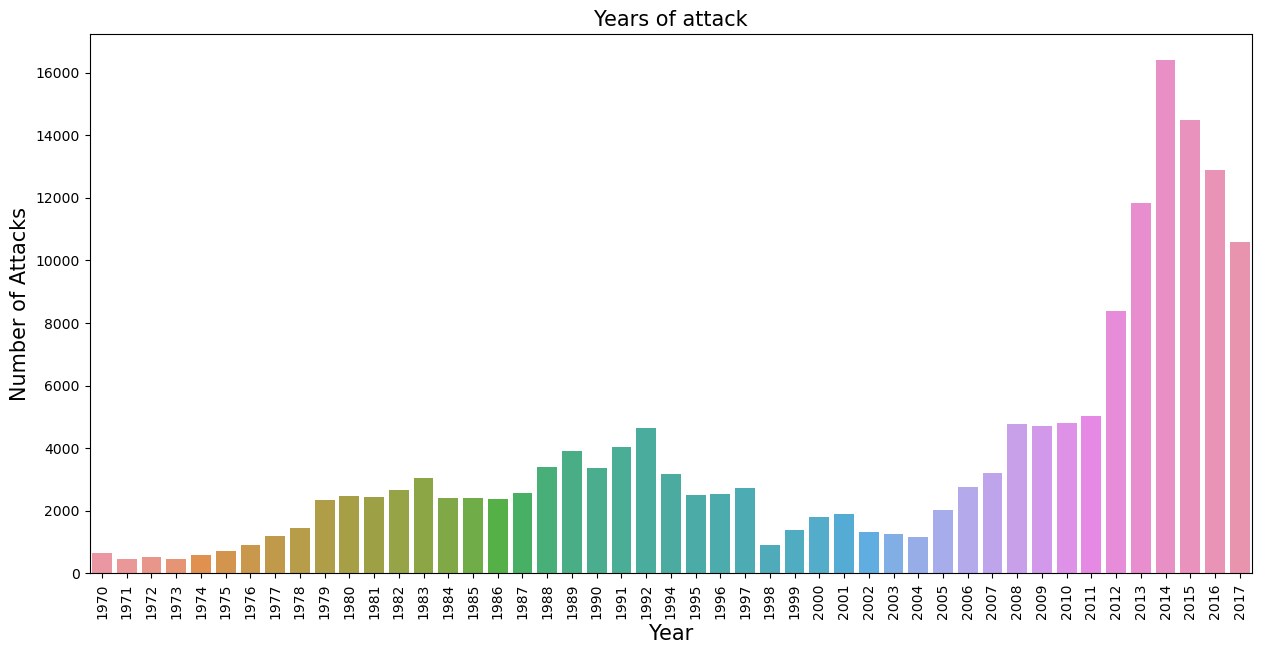

In [42]:
years = terr_dataset_final['Year'].unique()
count_of_years = terr_dataset_final['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (15,7))
sns.barplot(x = years,y = count_of_years)
plt.xticks(rotation = 90)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.title('Years of attack',fontsize=15)
plt.show()

Beginning in 2012, the number of attacks has increased, reaching its highest point in 2014.
After 2015, a minor decline is noted.

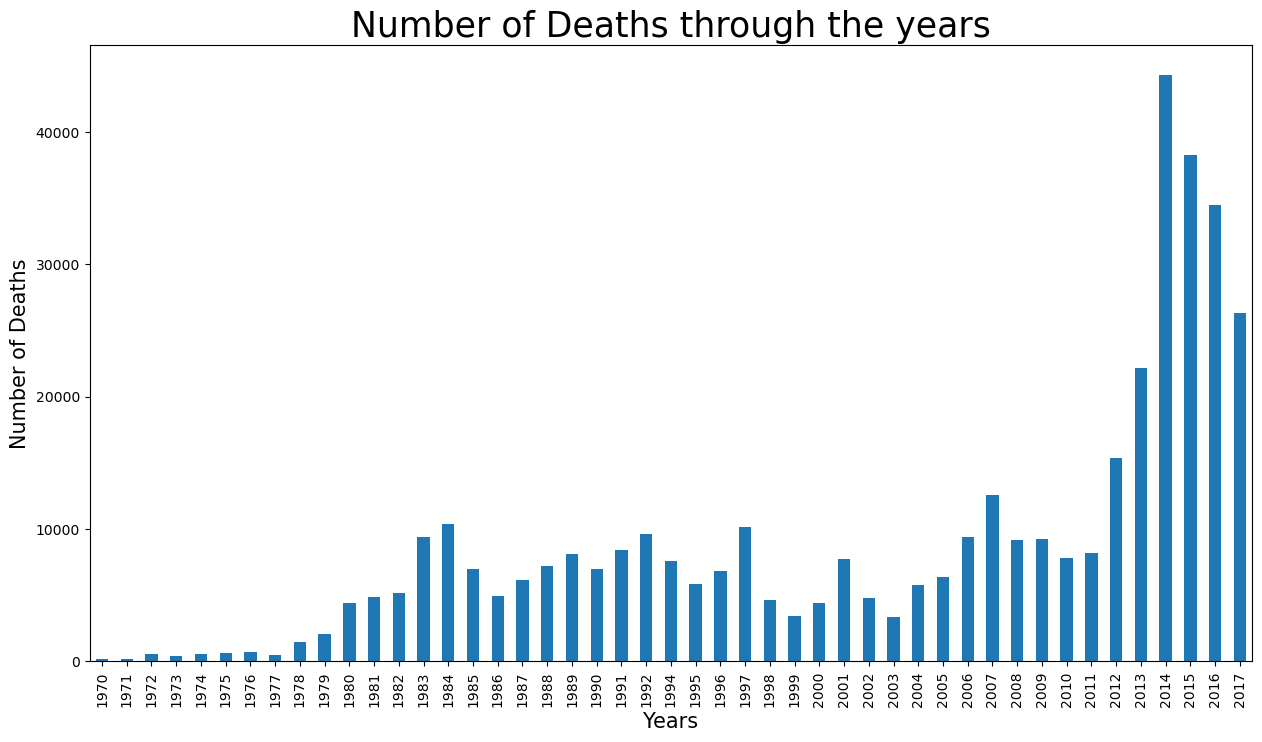

In [53]:
# Analysing the number of deaths taken place in each year.
plt.figure(figsize=(15,8))
terr_dataset_final.groupby(['Year'])['No_of_Killed'].sum().plot(kind='bar')
plt.title('Number of Deaths through the years',fontsize=25)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Deaths',fontsize=15)
plt.xticks(rotation=90)
plt.show()

The number of fatalities has been on the rise since 2012, reaching its highest point in 2014.
A declining trend is noticed after 2015

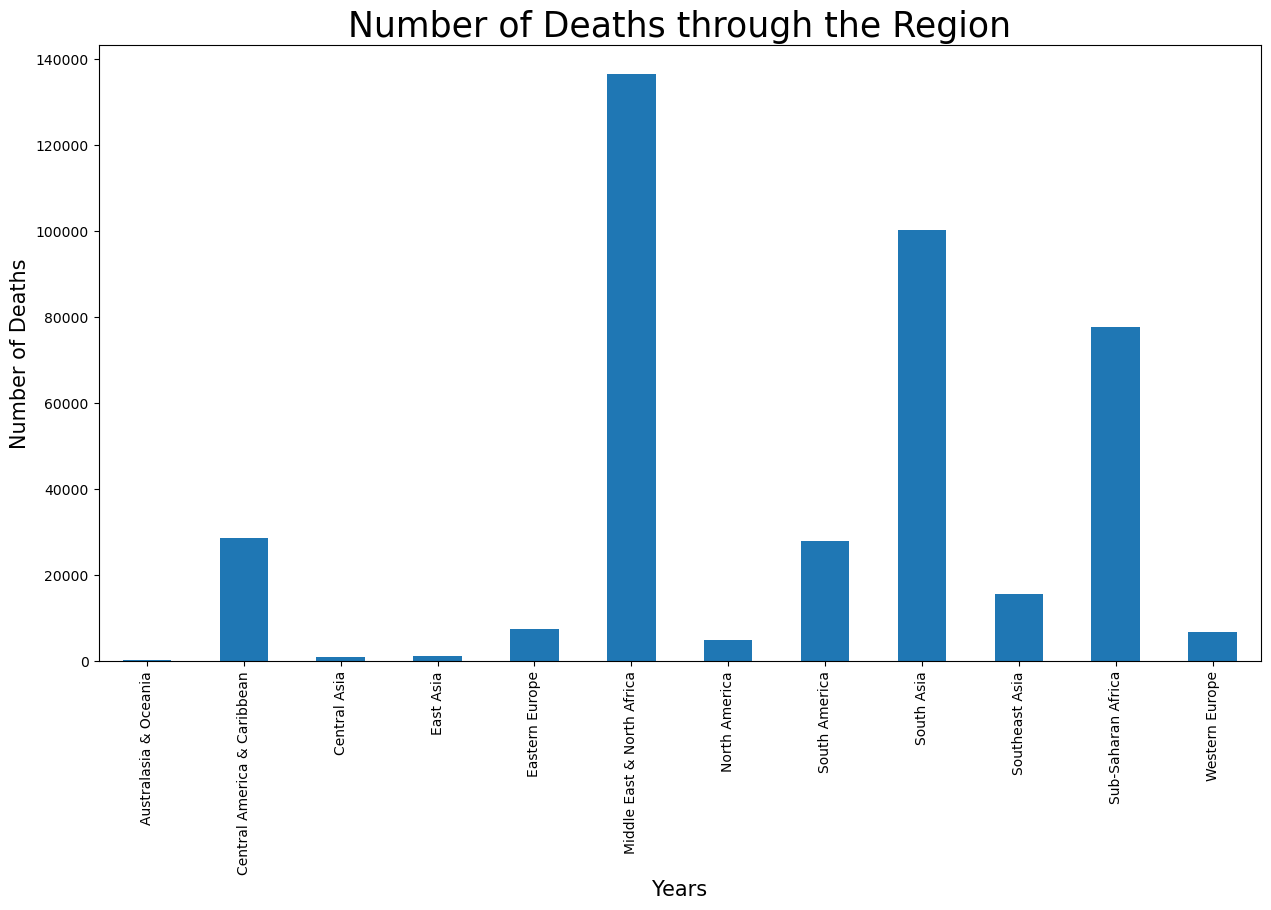

In [55]:
# Analysing the number of deaths taken place in region.
plt.figure(figsize=(15,8))
terr_dataset_final.groupby(['Region'])['No_of_Killed'].sum().plot(kind='bar')
plt.title('Number of Deaths through the Region',fontsize=25)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Deaths',fontsize=15)
plt.xticks(rotation=90)
plt.show()

The maximum deaths has been in the Middle East & North Africa region, followed by South Asia

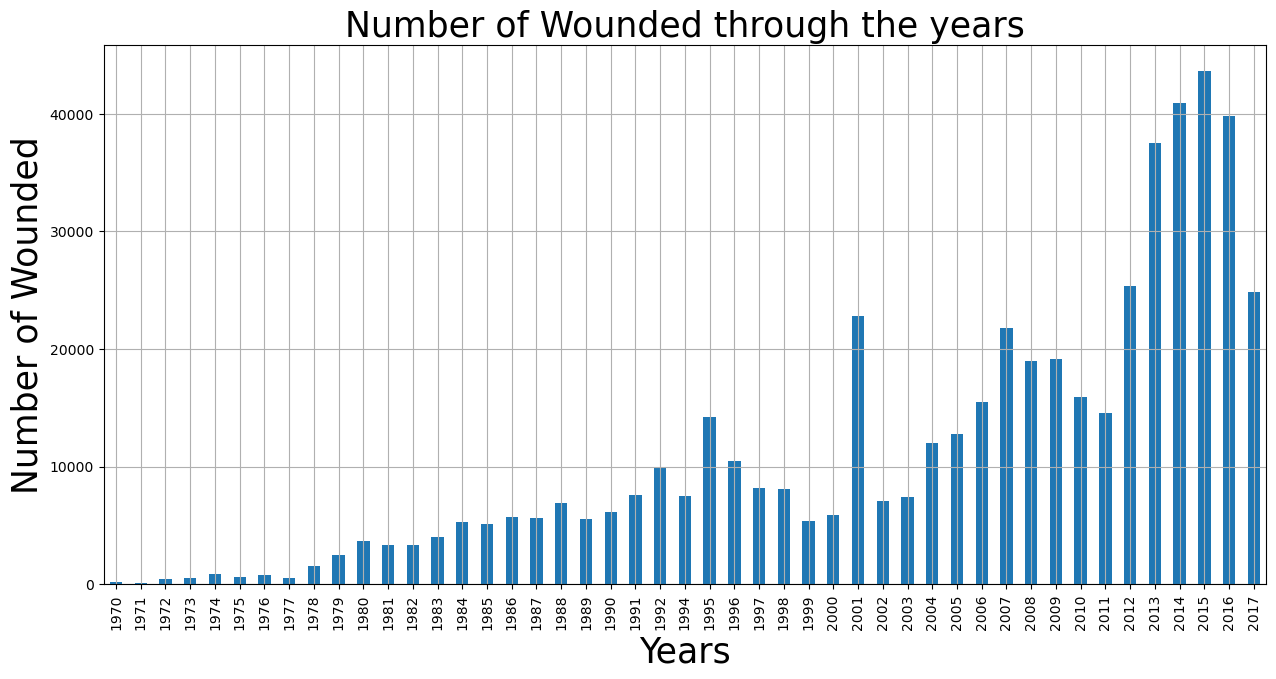

In [45]:
# Analysing the number of Wounded taken place in each year.
plt.figure(figsize = (15,7))
terr_dataset_final.groupby(['Year'])['No_of_Wounded'].sum().plot(kind='bar')
plt.title('Number of Wounded through the years',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Number of Wounded',fontsize=25)
plt.xticks(rotation=90)
plt.grid()
plt.show()

The number of fatalities peaked in 2014, exceeding 40,000.
The number of persons injured between 2013 and 2016 exceeds 380,000.
Also, the previous years with the highest number of injuries were 2001,2007,2012-1017.

In [46]:
#Analysis regarding ttype of target affected by attack
target=terr_dataset_final["target_type"].value_counts().sort_values(ascending=False).reset_index(name='Count')
target

,index,Count
0,Private Citizens & Property,41395
1,Military,27386
2,Police,23761
3,Government (General),20454
4,Business,18827
5,Transportation,6089
6,Unknown,5203
7,Religious Figures/Institutions,4284
8,Educational Institution,4173
9,Utilities,4106


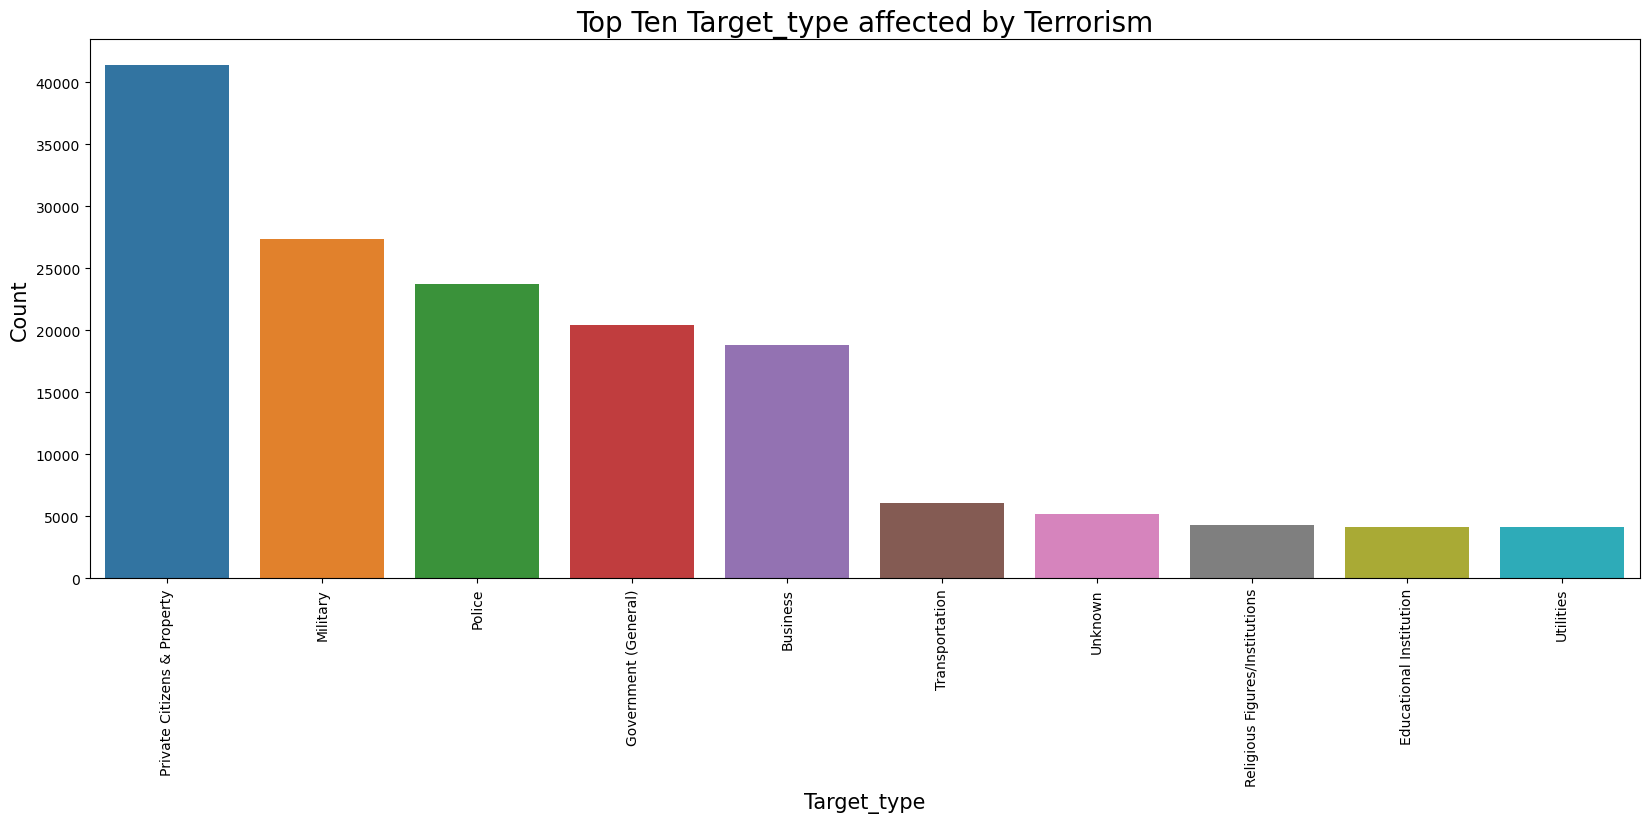

In [47]:
plt.figure(figsize=(20,7))
sns.barplot(x=target["index"][:10],y=target["Count"][:10])
plt.title("Top Ten Target_type affected by Terrorism",fontsize=20)
plt.xlabel("Target_type",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=90)
plt.show()


INSGHTS:   
1.Private Citizens and property is mostly affected by TERROR ATTACKS followed by Military

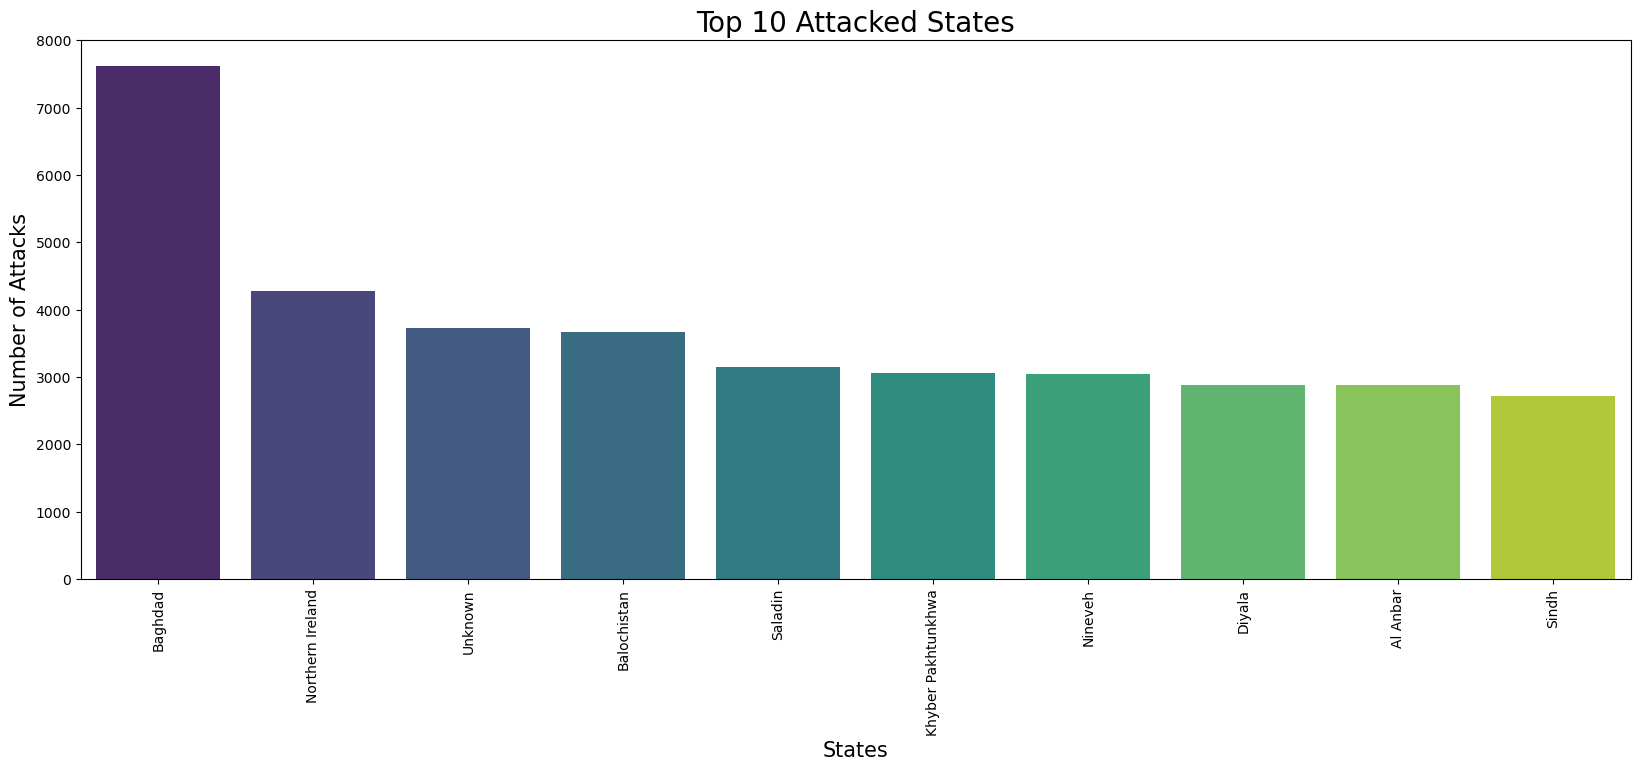

In [48]:

# States that were attacked the most
plt.figure(figsize=(20,7))
sns.barplot(x=terr_dataset_final['State'].value_counts().head(10).index,y=terr_dataset_final['State'].value_counts().head(10).values,palette="viridis")
plt.title('Top 10 Attacked States',fontsize=20)
plt.xlabel('States',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation=90)
plt.show()

It appears that Bagdad is the most affected state in case of terrorism  

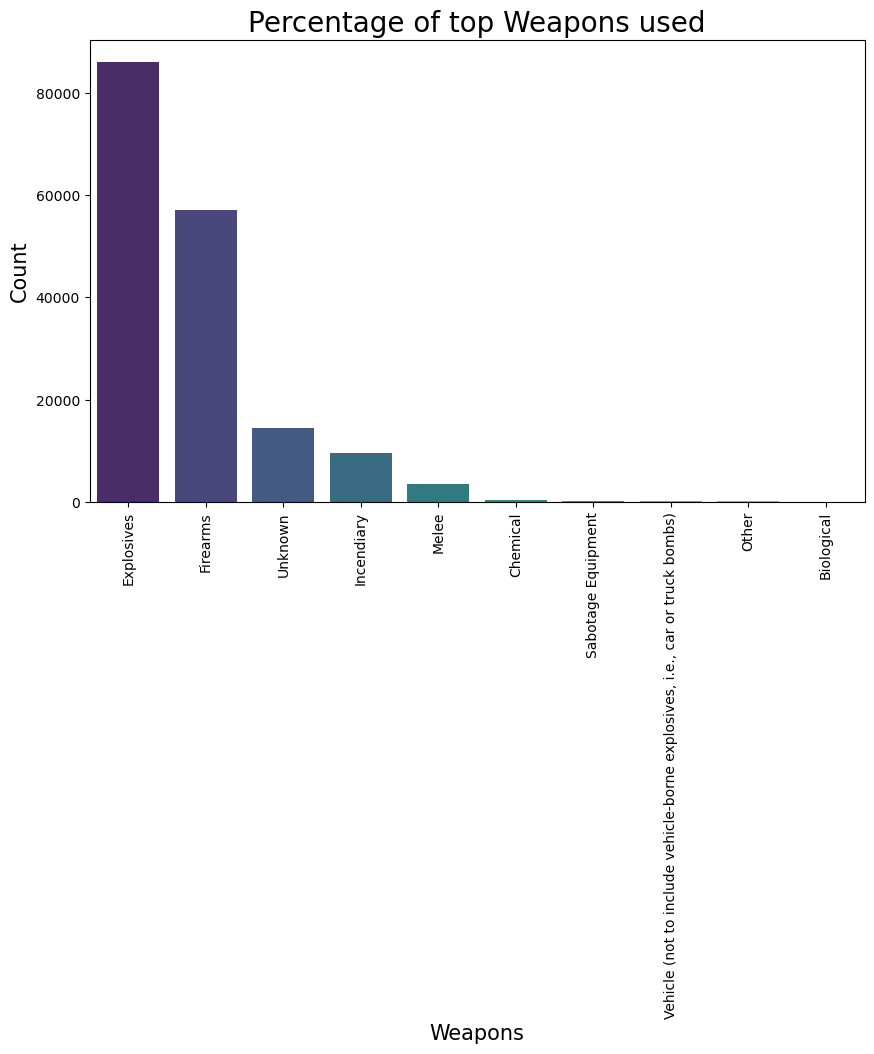

In [49]:
# Plotting the top ten weapons:

plt.figure(figsize=(10,6))
sns.barplot(x=terr_dataset_final["Weapon_type"].value_counts()[:10].index,y=terr_dataset_final["Weapon_type"].value_counts()[:10].values,palette="viridis")
plt.title("Percentage of top Weapons used",fontsize=20)
plt.xlabel("Weapons",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=90)
plt.show()


Explosives are the top weapons used.

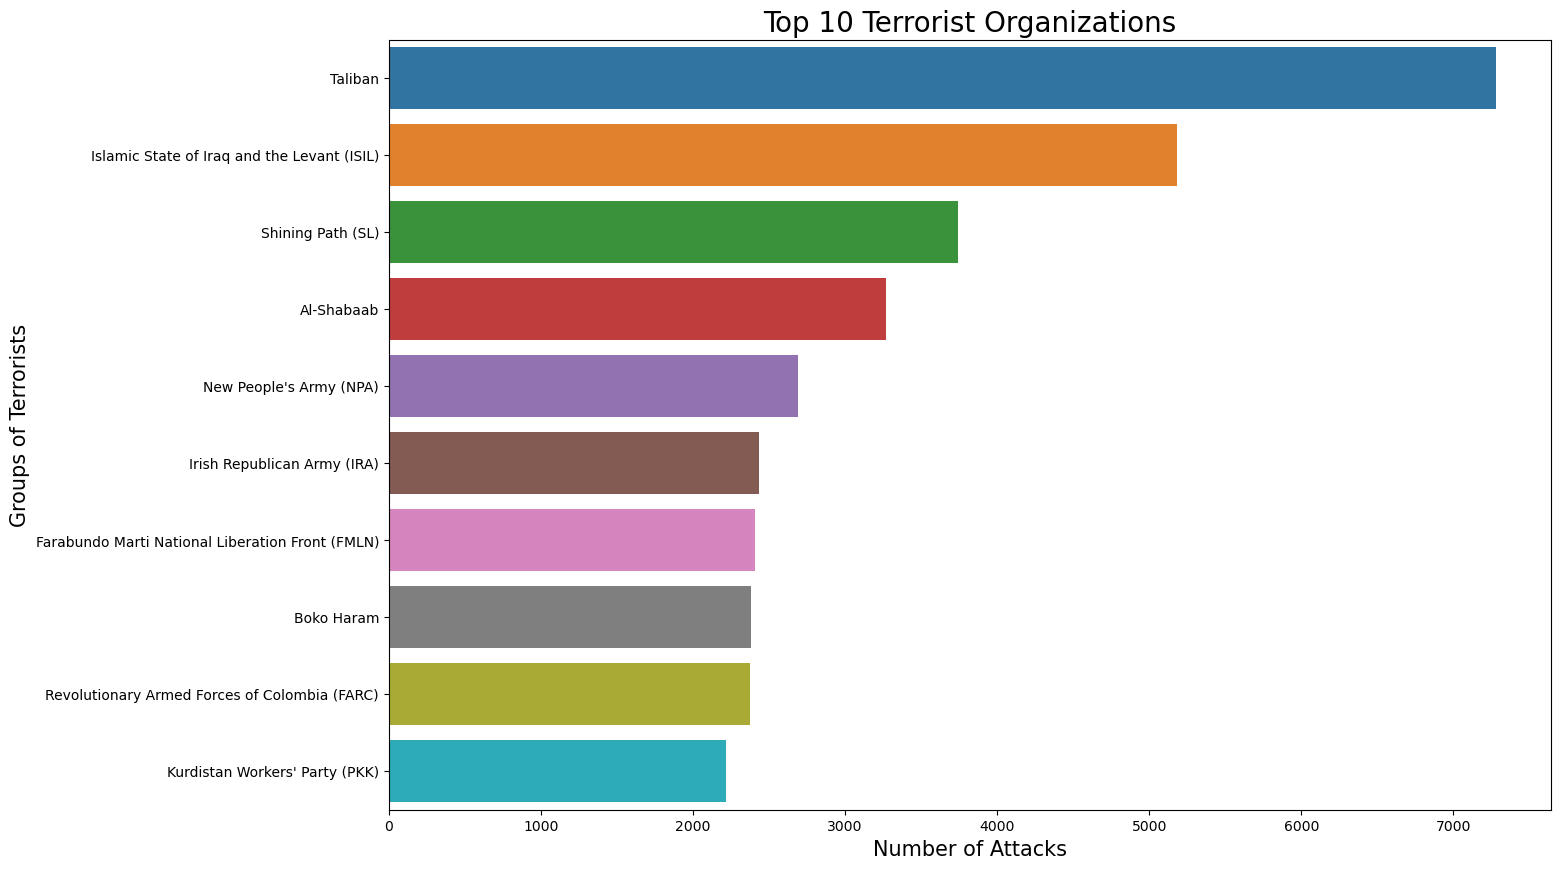

In [50]:
#top ten terrorist organizations:
plt.figure(figsize=(15,10))
sns.barplot(x=terr_dataset_final['Group'].value_counts()[1:11].values, y=terr_dataset_final['Group'].value_counts()[1:11].index)
plt.title('Top 10 Terrorist Organizations',fontsize=20)
plt.xlabel('Number of Attacks',fontsize=15)
plt.ylabel('Groups of Terrorists',fontsize=15)
plt.show()

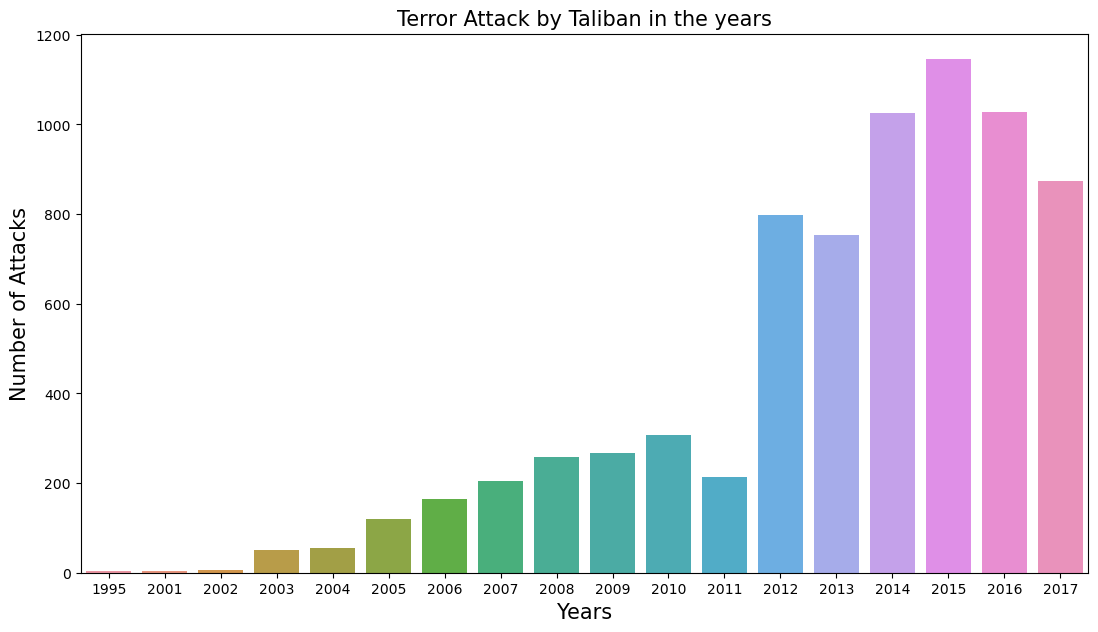

In [51]:
Taliban_terrorism = terr_dataset_final[terr_dataset_final["Group"]=="Taliban"]
ploting the attacks over the years made by Taliban:

plt.figure(figsize = (13,7))
sns.barplot(x=Taliban_terrorism['Year'].value_counts().index,y=terr_Taliban['Year'].value_counts().values)
plt.title('Terror Attack by Taliban in the years',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.show()


It appears that Taliban is the most dangerous terrorism group after ISIL

Iraq, followed by Pakistan, is the nation most hit by terrorism.
There are a few nations where the number of attacks is one, such as Falkland Island, Antigua, and Barbuda.
From 1970 to 2017, Iraq has had an average of fifteen assaults every month.

Middle East and North Africa are the two locations where terrorism happens most often, followed by South Asia and Sub-Saharan Africa.
Australasia and Oceania are the areas with the fewest inhabitants, followed by Central Asia and finally East Asia.
The most common attack type is bombing/explosion, followed by armed assault and then assassination, which is quite uncommon.
Since 2012, there has been a rise in the number of fatalities, which reached its high in 2014. After 2015, a decline is noted.
The area with the highest death toll has been the Middle East and North Africa, followed by South Asia.
In 2014, more than 40,000 people were slain. From 2013 to 2016, more than 38,000 people were injured. In 2001, 2007, 2012-1017, the greatest number of people were wounded.
Private citizens and their property are the primary targets of terrorist strikes, followed by the military.
11. Bagdad is the state most afflicted by terrorism.
The most common weapons are explosives and firearms.
Taliban is the most threatening terrorist organization, followed by ISIL.